In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [15]:
## Intialize file output directories
# From colab-setup, replace if changes were made to this file

parent_dir = '/drive/MyDrive/spotify-misinformation'

# Define file paths for where podcast claims and fact checked claims are located

preprocessing_output_dir = f"{parent_dir}/preprocessing-output"

fact_checked_claims_fp = f"{preprocessing_output_dir}/politifact_filtered.csv"
transcript_claims_fp = f"{preprocessing_output_dir}/podcast_claims_context_2.tsv"

# Define filepath for matched claims

matched_claims_output_dir = f"{parent_dir}/matched-claims-output"
matched_claims_fp = f"{matched_claims_output_dir}/matched_claims_context_2.txt"

# Model output directories and filepath for predicted labels

modeling_output_dir = f"{parent_dir}/modeling-output"

predicted_mc_fp = f"{modeling_output_dir}/only_predicted_label_predicted_mc_context_2.txt"
predicted_mc_veracity_fp = f"{modeling_output_dir}/predicted_mc_context_2.txt"

# Define labeling directory output

labeling_output_dir = f"{parent_dir}/labeling-output"
manually_labelled_data_fp = f"{labeling_output_dir}/manually-labeled-matched-pairs.csv"

# Data Analysis output dir for various figures 

data_analysis_output_dir = f"{parent_dir}/data-analysis-output"

## Manually Labeled Data Barplots



In [16]:
labeled_data = pd.read_csv(manually_labelled_data_fp)

,Fact Checked Claim Index,Podcast Claim Index,Fact Checked Claim,Podcast Claim,Stance Agreement
0,15673,13337,"""When the national debt reaches $15 trillion, ...",The next day it crashed peace and safety. Is ...,5
1,15508,2494200,"Says America spends ""over 17 percent of its GD...",We are getting sicker we spend more than we s...,2
2,912,3078202,"“If I don’t take the vaccine, I’m at risk for ...",This is extremely uncommon and. In very very ...,5
3,18351,4160261,"""Law enforcement in the state of Arizona suppo...",People would like the Harvest things. What wh...,5
4,7041,10930884,"""Nobody dies because they don’t have access to...",But something interesting to note is that bla...,3


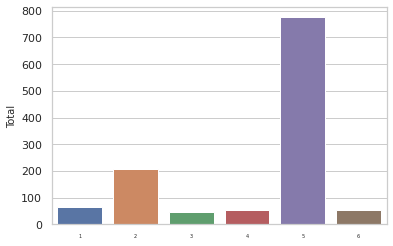

In [23]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=labeled_data['Stance Agreement'].value_counts().index, y=labeled_data['Stance Agreement'].value_counts())

ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
ax.set_ylabel("Total", fontsize = 10)

fig = ax.get_figure()
fig.savefig(f"{data_analysis_output_dir}/manually-labeled-annotations-barplot.png", dpi=500)

## Predicted Label Plots

In [ ]:
## Plot counts for predicted labels

misinformation_counts = {}

with open(predicted_mc_veracity_fp, 'r') as mc_veracity:

  for line in mc_veracity:
    t = line.strip().split(',')
    mis_label = t[-1]
    if mis_label in misinformation_counts:
      misinformation_counts[mis_label] += 1
    else:
      misinformation_counts[mis_label] = 0

labels = list(misinformation_counts.keys())
vals = [misinformation_counts[x] for x in labels]

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=labels, y=vals)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
ax.set_ylabel("Total", fontsize = 10)

fig = ax.get_figure()
fig.savefig(f"{data_analysis_output_dir}/predictions-labels-barplot.png", dpi=500)

In [ ]:
# Only plot relevant labels (no unrelated label)
unrelated_idx = labels.index('unrelated')

if unrelated_idx != -1:
  del labels[unrelated_idx]
  del vals[unrelated_idx]

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=labels, y=vals)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
ax.set_ylabel("Total", fontsize = 10)

fig = ax.get_figure()
fig.savefig(f"{data_analysis_output_dir}/predictions-no-unrelated-barplot.png", dpi=500)

## Manual Barplots used for Paper

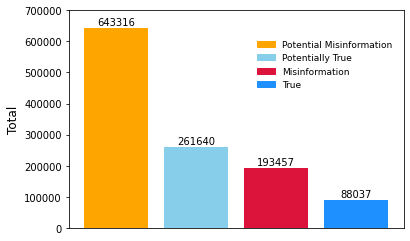

In [14]:
color = ('orange', 'skyblue', 'crimson', 'dodgerblue')
objects = ('Potential Misinformation', 'Potentially True', 'Misinformation', 'True')
y_pos = np.arange(len(objects))
performance = [643316, 261640, 193457, 88037]
width = 0.35  # the width of the bars
plt.bar(y_pos, performance, align='center', color=color)
plt.xticks(y_pos, objects)
plt.ylim(0, 700000)  # this adds a little space at the top of the plot, to compensate for the annotation
plt.ylabel('Total', fontsize=12)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

# map names to colors
cmap = dict(zip(performance, color))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

# add the legend
#plt.legend(title='Stance Agreement', labels=objects, handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0, fontsize=11, frameon=False)
plt.legend(labels=objects, handles=patches, bbox_to_anchor=(0.55, 0.75), loc='center left', borderaxespad=0, fontsize=9, frameon=False)

# add the annotations
for y, x in zip(performance, y_pos):
    plt.annotate(f'{y}\n', xy=(x, y), ha='center', va='center')

plt.savefig(f"{data_analysis_output_dir}/misinformation-barplot-predictions-manuscript.png", dpi=1000)